In [10]:
#import libreries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [11]:
#read data using pandas
df=pd.read_csv("/content/news.csv")

In [12]:
df.head()

,title,text,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,fake
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,fake
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",fake
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",fake
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,fake


In [13]:
#shape of data
df.shape

(44898, 3)

In [14]:
#check whether null values are present in dataset
df.isnull().sum()

title    0
text     0
label    0
dtype: int64

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   44898 non-null  object
 1   text    44898 non-null  object
 2   label   44898 non-null  object
dtypes: object(3)
memory usage: 1.0+ MB


In [16]:
#display label data usnig countplotgraph

<Axes: xlabel='label', ylabel='count'>

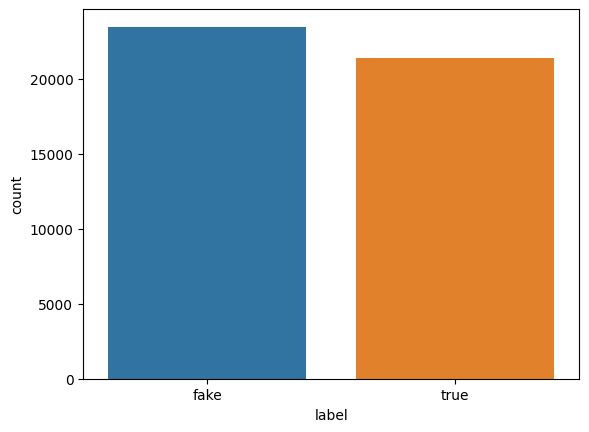

In [17]:
sns.countplot(data=df, x="label")

In [18]:
#display title data usng barchart

<Axes: >

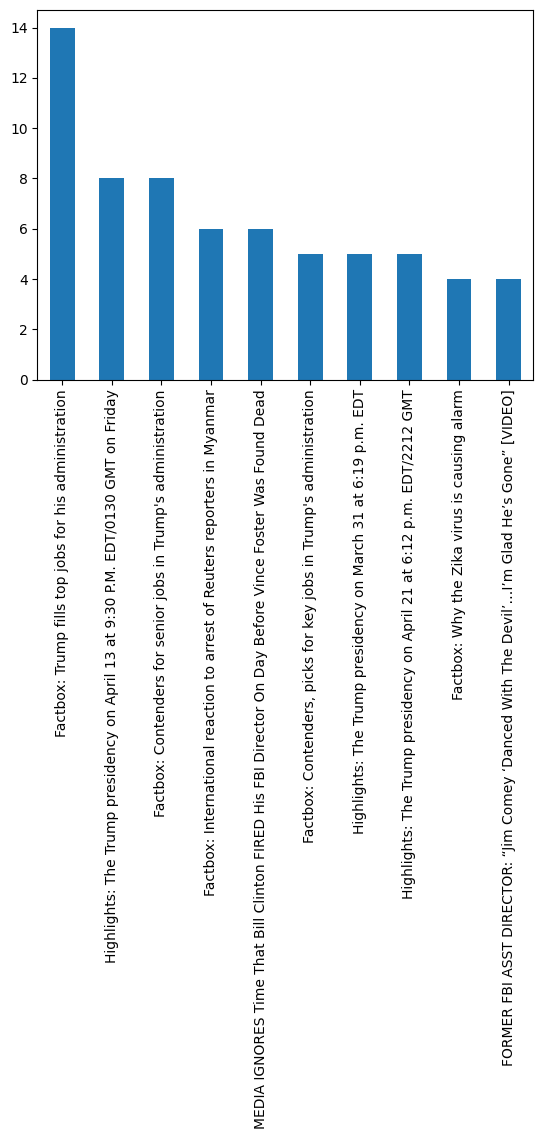

In [19]:
df['title'].value_counts()[:10].plot(kind='bar')

In [20]:
#preprocess the text

In [21]:
import re
import string

def preprocess(text):
    text = text.lower()
    text = text.translate(str.maketrans("", "", string.punctuation))
    words = text.split()
    words = [word for word in words if len(word.strip()) > 1]
    text = " ".join(words)
    return text

In [22]:
df["text"] = df["text"].apply(preprocess)

In [23]:
#applying lemmatizing

In [24]:
import nltk
from nltk.stem import WordNetLemmatizer

In [25]:
lemmatizer = WordNetLemmatizer()
def lemmatizing(text):
    stemmed_text = ""
    for word in text.split():
        stem = lemmatizer.lemmatize(word)
        stemmed_text += stem
        stemmed_text += " "

    stemmed_text = stemmed_text.strip()
    return stemmed_text

In [26]:
nltk.download("all")
import nltk
nltk.download('wordnet')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   U

True

In [27]:
df["text"] = df["text"].apply(lemmatizing)

In [28]:
from nltk.stem import PorterStemmer

stemmer = PorterStemmer()
def stemming(text):
    stemmed_text = ""
    for word in text.split():
        stem = stemmer.stem(word)
        stemmed_text += stem
        stemmed_text += " "

    stemmed_text = stemmed_text.strip()
    return stemmed_text

In [29]:
#Split the text and the labels

In [30]:
X = df["text"]
y = df["label"]

In [31]:
#Split the training and testing data

In [32]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [33]:
#Initialize the tf-idf vectorizer

In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vect = TfidfVectorizer()
tfidf_train = tfidf_vect.fit_transform(X_train)
tfidf_test = tfidf_vect.transform(X_test)

In [35]:
#initialize countvector

In [36]:
from sklearn.feature_extraction.text import CountVectorizer

count_vectorizer = CountVectorizer()
cv_train = count_vectorizer.fit_transform(X_train.values)
cv_test = count_vectorizer.transform(X_test.values)

In [37]:
#Predict the labels of the test data and Evaluation

In [38]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

mnb1 = MultinomialNB()
mnb1.fit(tfidf_train, y_train)
y_pred = mnb1.predict(tfidf_test)
ac1 = accuracy_score(y_test, y_pred)

In [39]:
mnb2 = MultinomialNB()
mnb2.fit(cv_train, y_train)
y_pred = mnb2.predict(cv_test)
ac2 = accuracy_score(y_test, y_pred)

In [40]:
from sklearn.ensemble import RandomForestClassifier

rf1 = RandomForestClassifier()
rf1.fit(tfidf_train, y_train)
y_pred = rf1.predict(tfidf_test)
ac3 = accuracy_score(y_test, y_pred)

In [41]:
rf2 = RandomForestClassifier()
rf2.fit(cv_train, y_train)
y_pred = rf2.predict(cv_test)
ac4 = accuracy_score(y_test, y_pred)

In [42]:
names = ["MNB-TFIDF", "MNB-CV", "RF-TFIDF", "RF-CV"]
scores = [ac1, ac2, ac3, ac4]

models = pd.DataFrame({"Name": names, "Score": scores})
models.head()

,Name,Score
0,MNB-TFIDF,0.940386
1,MNB-CV,0.957090
2,RF-TFIDF,0.984187
3,RF-CV,0.984929


<Axes: xlabel='Name', ylabel='count'>

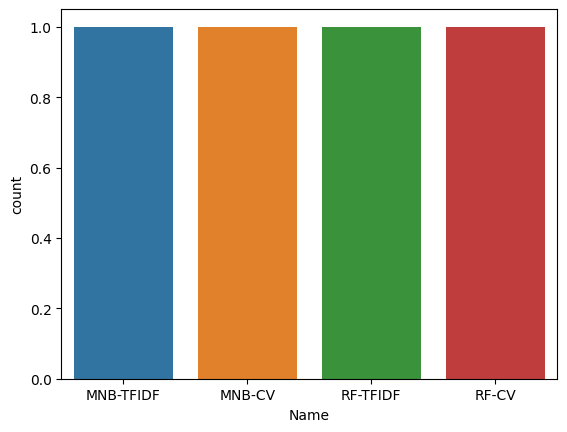

In [43]:
sns.countplot(data=models, x="Name")